<a href="https://colab.research.google.com/github/ycl818/Data_python/blob/main/Iris2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print('target name:'+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data.head(3)

target name:['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
target_name  ={
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

In [6]:
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name']=='versicolor')]
iris_data = iris_data[['sepal length (cm)','sepal width (cm)','target_name']]
iris_data.head(5)

,sepal length (cm),sepal width (cm),target_name
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [8]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [10]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)
iris_data

,sepal length (cm),sepal width (cm),target_name,target_class
0,5.1,3.5,setosa,1
1,4.9,3.0,setosa,1
2,4.7,3.2,setosa,1
3,4.6,3.1,setosa,1
4,5.0,3.6,setosa,1
...,...,...,...,...
95,5.7,3.0,versicolor,-1
96,5.7,2.9,versicolor,-1
97,6.2,2.9,versicolor,-1
98,5.1,2.5,versicolor,-1


In [11]:
del iris_data['target_name']
iris_data.head()

,sepal length (cm),sepal width (cm),target_class
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [12]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1

x: [1.  5.1 3.5]
w: [1.  5.1 3.5]


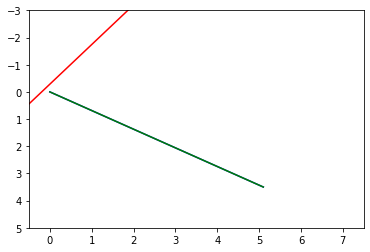

x: [1.  7.  3.2]
w: [ 0.  -1.9  0.3]


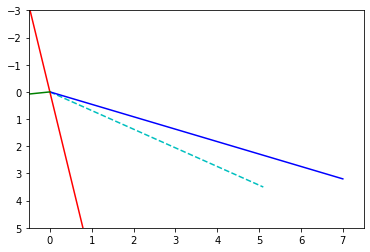

In [15]:
w = np.array([0.,0.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        if sign(np.dot(w,x)) != y:
            
            # 前一個Decision boundary 的法向量
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1])
                y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            x_vector = np.linspace(0,x[1])
            y_vector = (x[2]/x[1])*x_vector
            plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            x_decision_boundary_normal_vector = np.linspace(0,w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-0.5,7.5)
            plt.ylim(5,-3)
            plt.show()